# HTML5 animation of impulse response and bode diagram of the second-order delay system

In [84]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
from IPython.display import HTML

In [85]:
# Constants
# Animation
N_FRAMES = 100
INTERVAL = 50
REPEAT_DELAY = 50

# System
ZETAS = np.linspace(0.1, 2.0, N_FRAMES // 2)
ZETAS = np.append(ZETAS, ZETAS[::-1])
K = 1.0
OMEGA_N = 1.0

# Time vector
t = np.arange(0, 20, 0.01)

# Frequency vector
omega = np.logspace(-2, 2, 200)

In [86]:
# Function of frequency-domain transfer function
def G(K, omega_n, zeta, s):
    return K * omega_n ** 2 / (s**2 + 2 * zeta * omega_n * s + omega_n**2)

# Function of time-domain impulse response
def g(K, omega_n, zeta, t):
    if zeta < 1.0:
        return K * omega_n / np.sqrt(1 - zeta**2) * np.exp(-zeta * omega_n * t) \
            * np.sin(np.sqrt(1 - zeta**2) * omega_n * t)
    elif zeta == 1.0:
        return K * omega_n**2 * t * np.exp(-omega_n * t)
    elif zeta > 1.0:
        return K * omega_n / np.sqrt(zeta**2 - 1) * np.exp(-zeta * omega_n * t) \
            * np.sinh(np.sqrt(zeta**2 - 1) * omega_n * t)

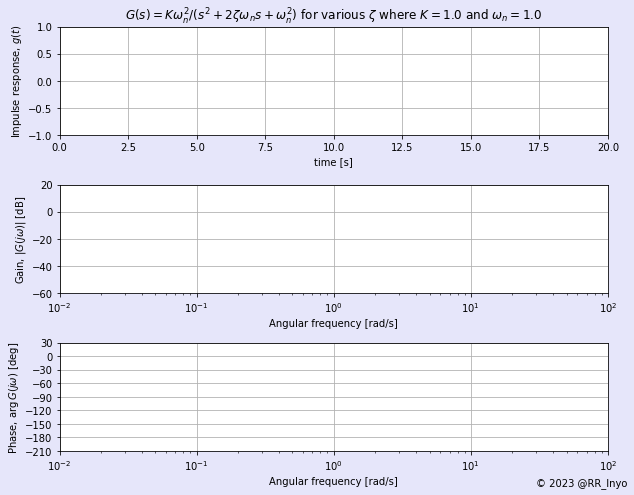

In [87]:
# Prepare figure and axis objects
fig, ax = plt.subplots(3, 1, figsize = (9, 7))
fig.patch.set_facecolor('lavender')

# Plot skeleton, time-domain impulse response
curve_imp, = ax[0].plot([], [], lw = 2)
text_zeta = ax[0].text(10, 0.6, '', ha = 'center', va = 'bottom')
ax[0].set_xlim(0, 20)
ax[0].set_ylim(-1, 1) 
ax[0].set_title(f'$G(s) = K \omega_n^2 / (s^2 + 2 \zeta \omega_n s + \omega_n^2)$ for various $\zeta$ where $K = {K}$ and $\omega_n = {OMEGA_N}$')
ax[0].set_xlabel('time [s]')
ax[0].set_ylabel('Impulse response, $g(t)$')
ax[0].grid()

# Plot skeleton, frequency-domain gain
curve_gain, = ax[1].semilogx([], [], lw = 2)
mark_peak, = ax[1].semilogx([], [], ls = 'None', marker='x')
text_peak = ax[1].text(0, 0, '', ha = 'center', va = 'bottom')
ax[1].set_xlim(0.01, 100)
ax[1].set_ylim(-60, 20) 
ax[1].set_xlabel('Angular frequency [rad/s]')
ax[1].set_ylabel(r'Gain, $|G(j \omega)|$ [dB]')
ax[1].grid()

# Plot skeleton, frequency-domain phase
curve_phase, = ax[2].semilogx([], [], lw = 2)
ax[2].set_xlim(0.01, 100)
ax[2].set_ylim(-180, 30) 
ax[2].set_yticks(range(-210, 60, 30))
ax[2].set_xlabel('Angular frequency [rad/s]')
ax[2].set_ylabel(r'Phase, $\arg G(j \omega)$ [deg]')
ax[2].grid()
ax[2].text(30, -285, '© 2023 @RR_Inyo')

fig.tight_layout()

In [88]:
# Define update function to make one frame
def update(frame):
    
    # Obtain time-domain impulse response
    zeta = ZETAS[frame]
    y = g(K, OMEGA_N, zeta, t)
    
    # Plot, time-domain impulse response
    curve_imp.set_data(t, y)
    text_zeta.set_text(f'$\zeta = {zeta:.3f}$')
    if zeta < 1 / np.sqrt(2.0):
        omega_r = np.sqrt(1 - 2 * zeta**2) * OMEGA_N
        Yr = G(K, OMEGA_N, zeta, 1j * omega_r)
        mark_peak.set_data(omega_r, 20*np.log10(np.abs(Yr)))
        text_peak.set_x(omega_r)
        text_peak.set_y(20*np.log10(np.abs(Yr)))
        text_peak.set_text('Peak')
    else:
        mark_peak.set_data([], [])
        text_peak.set_x(0)
        text_peak.set_y(0)
        text_peak.set_text('')
        
    # Obtain frequency-domain response
    Y = G(K, OMEGA_N, zeta, 1j * omega)    
    
    # Plot, frequency-domain gain
    curve_gain.set_data(omega, 20*np.log10(np.abs(Y)))
    
    # Plot, frequency-domain phase
    curve_phase.set_data(omega, np.degrees(np.angle(Y)))
    
    return (curve_imp, mark_peak, text_zeta, text_peak, curve_gain, curve_phase)

In [89]:
# Create animation
ani = animation.FuncAnimation(fig, update, frames = N_FRAMES, \
    interval = INTERVAL, repeat_delay = REPEAT_DELAY, blit = True)

# Show animation
HTML(ani.to_html5_video())

#print('Saving an animation gif file...')
#ani.save(FILE)